# HOMELESSNESS IN AUSTIN
![jwj-Homeless-1417.jpg](jwj-Homeless-1417.jpg)

In 2019 Austin, TX city council made a bold move to "decriminalize homelessness" by lifting the camping ban inside city limits and getting rid of citations for panhandling and sitting or standing on sidewalks. This measure drew plenty of national attention with both praise and criticism but was ultimately recended in a recent vote in April and Austin begin enforcing the camping ban once again in July. There is no shortage of opinions on what the "problem" is and what the city "should" be doing, but I began to wonder instead, what COULD the city do. The focus of this report is on summarizing the homelessness situation in Austin in the context of the state and national homeless situation, analyzing the city's goals, metrics and budget, and trying to identify oppotunities for the city to have a bigger impact on its effort to reduce homelessness. 

The datasets that I used for this analysis are 
- [CoC System Performance Measures Data](https://www.hudexchange.info/resource/5691/system-performance-measures-data-since-fy-2015/)
- [Austin CoC Dashboard](https://files.hudexchange.info/reports/published/CoC_Dash_CoC_TX-503-2019_TX_2019.pdf)
- [City Manager report for recommendations on addressing homelessness](http://www.austintexas.gov/edims/pio/document.cfm?id=344008)
- [2007 - 2020 Point-in-Time Estimates by State](https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-state.xlsx)
- [2007 - 2020 Point-in-Time Estimates by CoC ](https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-CoC.xlsx)
- [Austin population](https://cdn1.austinchamber.com/%20ed/files/GreaterAustinProfileData.xlsx?mtime=20210701135126&_ga=2.131708751.1171804070.1626996919-1803679446.1626996919)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setup matplotlib to operate in Jupyter Notebooks
%matplotlib inline

In [4]:
# Pulling the PIT homeless counts from an excel spreadsheet where each year is on a separate page

years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

def open_PIT_sheet(years):
    """Open PIT count and concat pages for select columns"""
    
    cols = ['Overall Homeless, ', 'Sheltered Total Homeless, ', 'Unsheltered Homeless, ']
    
    df = pd.DataFrame()
    for i in range(len(years)):
        new_c = ['State'] + [ c + years[i] for c in cols]
        df2 = pd.read_excel('2007-2020-PIT-Estimates-by-state.xlsx', sheet_name= years[i], header=0, usecols=new_c)
        df2['year'] = years[i]
        df2.rename(columns={new_c[1]: cols[0], new_c[2]: cols[1], new_c[3]: cols[2]}, inplace=True)
        df = pd.concat([df, df2], axis=0)
    return df

pit = open_PIT_sheet(years)

# separating the counts for total US count and Texas state count

tx_mask = pit['State'] == 'TX' 
total_mask = pit['State'] == 'Total'
tx_pit = pit[tx_mask].copy()
total_pit = pit[total_mask].copy()


    
    

In [11]:
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


def open_coc_sheet(years):
    """Open PIT count and concat pages for select columns"""
    
    cols = ['Overall Homeless, ', 'Sheltered Total Homeless, ', 'Unsheltered Homeless, ']
    
    df = pd.DataFrame()
    for i in range(len(years)):
        # adding year suffix to column names for the column on each page
        new_c = [ c + years[i] for c in cols] + ['CoC Number']
        df2 = pd.read_excel('2007-2020-PIT-Estimates-by-CoC.xlsx', sheet_name= years[i], header=0, usecols=new_c)
        # add column to identify year
        df2['year'] = years[i]
        # selecting only the row for Austin
        austin_mask = df2['CoC Number'] == 'TX-503'
        df2 = df2[austin_mask]
        df2.rename(columns={new_c[0]: cols[0], new_c[1]: cols[1], new_c[2]: cols[2]}, inplace=True)
        df = pd.concat([df, df2], axis=0)
    return df

coc = open_coc_sheet(years)

# 


In [144]:
# Austin City population from https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/population_history_pub_2019.pdf

year = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
count = [735088, 750525, 774037, 790390, 812025, 832326, 855215, 878733, 900701, 926426, 949587, 967629, 985504, 995484]
thousand = [7350.88, 7505.25, 7740.37, 7903.9, 8120.25, 8323.26, 8552.15, 8787.33, 9007.01, 9264.26, 9495.87, 9676.29, 9855.04, 9954.84]



austin_pop = pd.DataFrame({'year': year, 'population': count, '10k': thousand})


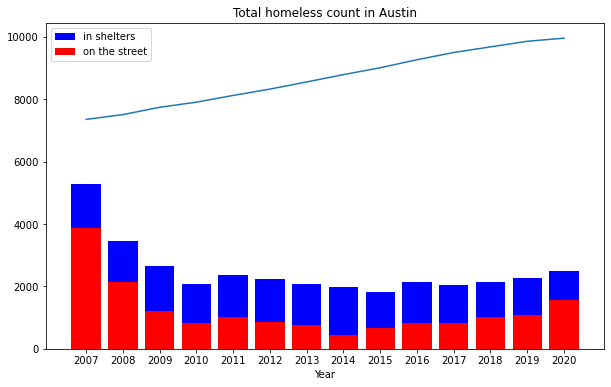

In [145]:
plt.figure(figsize=(10,6))
plt.bar(coc['year'], height = coc['Overall Homeless, '], color='b', label='in shelters')
plt.bar(coc['year'], height = coc['Unsheltered Homeless, '], color='r', label='on the street')
plt.plot(coc['year'], austin_pop.loc[:,'10k'])

plt.xlabel('Year')
plt.title('Total homeless count in Austin')
plt.legend()

plt.show()



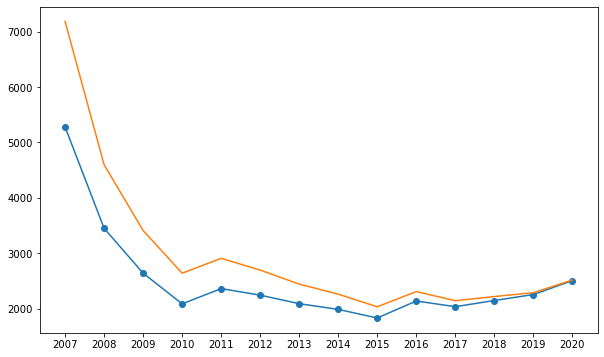

,CoC Number,"Overall Homeless,","Sheltered Total Homeless,","Unsheltered Homeless,",year,austin_population,pop_per_homeless,10K_pop,homeless_per_10k,1M_pop,homeless_per_1M
0,TX-503,5281.0,1395.0,3886.0,2007,735088,139.194849,7350.88,7184.173868,0.735088,7184.173868
1,TX-503,3451.0,1305.0,2146.0,2008,750525,217.480440,7505.25,4598.114653,0.750525,4598.114653
2,TX-503,2641.0,1418.0,1223.0,2009,774037,293.084816,7740.37,3411.981598,0.774037,3411.981598
3,TX-503,2087.0,1254.0,833.0,2010,790390,378.720652,7903.90,2640.468629,0.790390,2640.468629
4,TX-503,2362.0,1358.0,1004.0,2011,812025,343.787045,8120.25,2908.777439,0.812025,2908.777439
5,TX-503,2244.0,1375.0,869.0,2012,832326,370.911765,8323.26,2696.058996,0.832326,2696.058996
6,TX-503,2090.0,1325.0,765.0,2013,855215,409.193780,8552.15,2443.829914,0.855215,2443.829914
7,TX-503,1987.0,1539.0,448.0,2014,878733,442.241067,8787.33,2261.210174,0.878733,2261.210174
8,TX-503,1832.0,1165.0,667.0,2015,900701,491.649017,9007.01,2033.971318,0.900701,2033.971318
9,TX-503,2138.0,1322.0,816.0,2016,926426,433.314312,9264.26,2307.793607,0.926426,2307.793607


In [176]:
coc.reset_index(inplace=True, drop=True)
coc['austin_population'] = austin_pop.loc[:,'population']
coc['pop_per_homeless'] = coc['austin_population'] / coc['Overall Homeless, ']
coc['1M_pop'] = coc['austin_population'] / 1000000
coc['homeless_per_1M'] = coc['Overall Homeless, '] / coc['1M_pop']
coc['10K_pop'] = coc['austin_population'] / 100


plt.figure(figsize=(10,6))
plt.scatter(coc['year'], coc['Overall Homeless, '])
plt.plot(coc['year'], coc['Overall Homeless, '], label='Total Homeless')
plt.plot(coc['year'], coc['homeless_per_1M'], label='Homeless per Million people in Austin')
#plt.plot(coc['year'], coc['10K_pop'])
plt.show()
coc

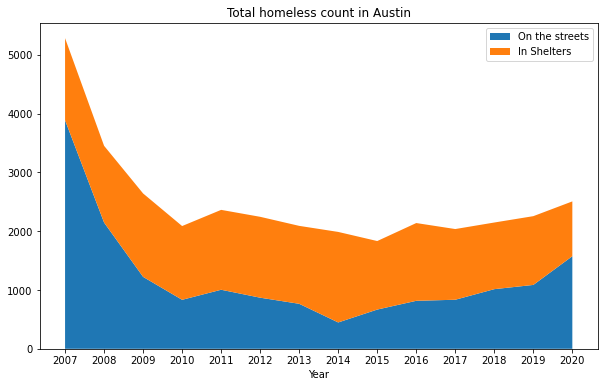

In [41]:
plt.figure(figsize=(10,6))
#plt.plot(coc['year'], coc['Sheltered Total Homeless, '], color='b', label='total homeless')
#plt.plot(coc['year'], coc['Unsheltered Homeless, '], color='r', label='on the street')
plt.xlabel('Year')
plt.title('Total homeless count in Austin')

plt.stackplot(coc['year'], [coc['Unsheltered Homeless, '], coc['Sheltered Total Homeless, ']], labels=['On the streets', 'In Shelters'])
plt.legend()
plt.show()

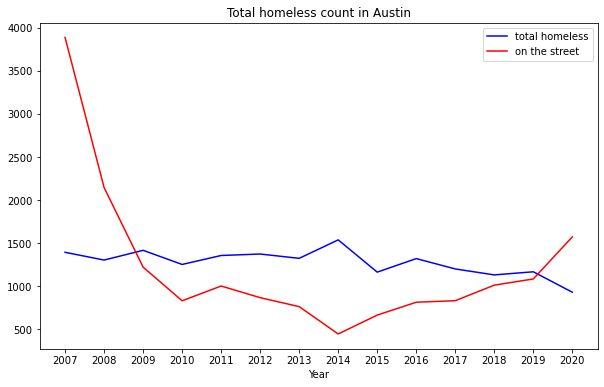

In [42]:
plt.figure(figsize=(10,6))
plt.plot(coc['year'], coc['Sheltered Total Homeless, '], color='b', label='total homeless')
plt.plot(coc['year'], coc['Unsheltered Homeless, '], color='r', label='on the street')
plt.xlabel('Year')
plt.title('Total homeless count in Austin')

#plt.stackplot(coc['year'], [coc['Unsheltered Homeless, '], coc['Sheltered Total Homeless, ']], labels=['On the streets', 'In Shelters'])
plt.legend()
plt.show()

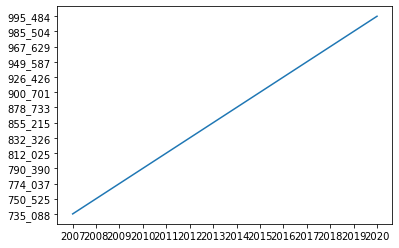

In [124]:
plt.plot(coc['year'], austin_pop.loc[1:,'population'])

In [113]:
balls= pd.read_excel('GreaterAustinPopulationData.xlsx', header=3)
current = balls.iloc[1:19,:6]
current = current.drop(labels=9, axis=0)
current.rename(columns={'Unnamed: 0': 'location', 'Percent change': 'percent_change_2000-2010', 'Unnamed: 5': 'percent_change_2010_2020'}, inplace=True)
current_mask = current['location']=='Austin '
austin_pop = current[current_mask]
#austin_
a_years = [2000, '2010', '2020']
#a_pops = [austin_pop[[a_years]]]
austin_pop

,location,2000,2010,2020,percent_change_2000-2010,percent_change_2010_2020
10,Austin,670654,801829,995484,0.195593,0.241517


In [116]:
year = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
count = [718912, 735088, 750525, 774037, 790390, 812025, 832326, 855215, 878733, 900701, 926426, 949587, 967629, 985504, 995484]

austin_pop = pd.DataFrame({'year': year, 'population': count})
austin_pop

,year,population
0,2006,718_912
1,2007,735_088
2,2008,750_525
3,2009,774_037
4,2010,790_390
5,2011,812_025
6,2012,832_326
7,2013,855_215
8,2014,878_733
9,2015,900_701


In [ ]:
# import the System Performace Measures Data

# sheets from excel document to be read in and combined
sheets = ['2020', '2019', '2018', '2017', '2016', '2015']

def import_SPMD(year_list):
    """import and SPD as pandas dataframe"""
    df = pd.read_excel('System-Performance-Measures-Data-Since-FY-2015.xlsx', sheet_name= year_list[0], header=[1])
    df['year'] = year_list[0] 
    for year in year_list[1:]:
        next_df = pd.read_excel('system_performance_data.xlsx', sheet_name= year, header=[1])
        next_df['year'] = year
        df = pd.concat([df, next_df], axis=0)
        
    return df

spmd = import_SPMD(sheets)
spmd.shape

  

In [ ]:
# write a function to delete 2017 "ES-SH-TH-PH 1st Time Homeless" last row
# write a function to clean up multi-indexing
# write a function to reformat the "SO" columns
# write a function to remove all columns that I do not use 

In [ ]:
# write a function to group data by the year for quick analysis
spmd_by_year = spmd.groupby('year')


ball_group = balls.groupby('year').sum()
new_homeless_by_year = ball_group['ES-SH-TH-PH 1st Time Homeless']
homeless_count_by_year = ball_group['Total HMIS Count']
new_homeless_by_year
homeless_count_by_year

In [126]:
count = ['718_912', '735_088', '750_525', '774_037', '790_390', '812_025', '832_326', '855_215', '878_733', '900_701', '926_426',\
         '949_587', '967_629', '985_504', '995_484']
recount = []
for c in count:
    c = int(c)
    recount.append(c)
    
print(recount)

[718912, 735088, 750525, 774037, 790390, 812025, 832326, 855215, 878733, 900701, 926426, 949587, 967629, 985504, 995484]


![homelessness_diagram.jpg](homelessness_diagram.jpg)